# Analysis on the Busiest Airports of the World

Analysis on Populous Airports by Passenger Traffic and Prediction of Top 5 Busiest Airports based on Webscrapped Data.

Fetching data from Wikipedia:

Data is webscrapped from https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic. The big picture about this data is, it contains year wise list of top 50 airports across the globe based on passenger traffic and the percent change in passenger traffic as compared to the previous year, from year 2010 to year 2016.

This project incorporates the following steps:
    
    1. Fetch the data from website.
    2. Extract the required tables.
    3. Create a dictionary of airports with country, yearwise passenger traffic and year wise passenger traffic percentage change.
    4. Convert the dictionary to dataframe
    5. Save the extracted data as HTML and CSV files.
    6. Analysis and plot of most populous airports globally and the growth pattern.
    7. Analysis and plot of most populous airports in United States of America and the growth pattern.
    8. Predictive Analysis on passenger traffic growth pattern to indentify the top 5 busiest airports.
    


In [12]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import requests
import numpy as np
from pattern import web
import seaborn as sns

## Step 1: Get the Data from Wikipedia





Fetching the data from the wiki page

In [15]:
url = 'https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic'
website_html = requests.get(url).text
website_html

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of busiest airports by passenger traffic - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_busiest_airports_by_passenger_traffic","wgTitle":"List of busiest airports by passenger traffic","wgCurRevisionId":809867980,"wgRevisionId":809867980,"wgArticleId":1967116,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Wikipedia pages semi-protected from banned users","Lists of busiest airports"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTa

In [17]:
dom = web.Element(website_html)
tables = dom.by_class('wikitable sortable')


[Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=u'tr'),
 Element(tag=

## Step 2: Create a Dictionary

In [18]:
result = defaultdict(dict)
year = 2016

Create a dictionary from the extracted tables

In [19]:
for tbl in tables:
    
    #count += 1
    #if count > 0:
        
        headers = tbl('tr')
        first_header = headers[0]
        th_s = first_header('th')
        
        #Fetch the country header
        attribute_country = [str(th_s[3].content)]
        country_index = 3
        
        #Fetch the total passenger and percent change header
        attribute_parameters = [str(year) + " " + str(th_s[5].content).replace("<br />"," ").replace("\n",""), str(year) + " " + str(th_s[7].content).replace("<br />"," ").replace("\n","")]
        parameters_index = [5,7]
        
        rows = tbl('tr')[1:]
        for i in range(0,len(rows)):
            
            row = rows[i]
            tds = row('td')
            
            #Fetch the airport name
            airport_name = tds[1]('a')[1].content
            
            #Add the airport to the dictionary
            if airport_name not in result:  
                airport_country = [tds[country_index].content]
                subdict = dict(zip(attribute_country,airport_country))
                result[airport_name].update(subdict)
                
            #Fetch the total passenger traffic and passenger traffic percent change
            airport_parameters = []
            for colindex in parameters_index:
                if colindex == 5:   
                    #if tds[colindex].content.find("<") == -1:
                        airport_parameters.append(int(tds[colindex].content.replace(",","")))
                    #else:
                    #    airport_parameters.append(int(tds[colindex].content[0:tds[colindex].content.find("<")].replace(",","")))
                if colindex == 7:
                    try:
                        if tds[colindex].content.find("Decrease") > -1:                
                            airport_parameters.append(float(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%",""))*-1)
                        else:
                            airport_parameters.append(float(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%","")))
                    except:
                        airport_parameters.append(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%",""))
            
            #Add the total passenger traffic and passenger traffic percent change to the dictionary
            subdict = dict(zip(attribute_parameters, airport_parameters))           
            result[airport_name].update(subdict)
        year = year - 1
        
print result

defaultdict(<type 'dict'>, {u'Newark Liberty International Airport': {'2012 % change ': 0.9, '2011 % change ': 1.3, '2010 % change': u'', 'Country': u'United States', '2010 Total passengers': 33133852, '2015 Total passengers': 37494704, '2016 Total passengers': 40289969, '2016 % change': 7.4, '2014 % change': 1.7, '2015 % change': 5.3, '2012 Total passengers': 33993962, '2011 Total passengers': 33577154, '2013 Total passengers': 35016236, '2014 Total passengers': 35610759, '2013 % change': 3.0}, u'Toronto Pearson International Airport': {'2012 % change ': 4.4, '2011 % change ': 4.5, '2010 % change': u'', 'Country': u'Canada', '2010 Total passengers': 31937895, '2015 Total passengers': 41036847, '2016 Total passengers': 44335198, '2016 % change': 8.0, '2014 % change': 6.8, '2015 % change': 6.4, '2012 Total passengers': 34912456, '2011 Total passengers': 33434199, '2013 Total passengers': 36037962, '2014 Total passengers': 38569088, '2013 % change': 3.2}, u'Hartsfield\u2013Jackson Atlant

## Step 3: Create a Data Frame


Convert the dictionary to dataframe

In [24]:
# By using the pd.DataFrame method from the Pandas Library, we created a dataframe 
# We took the dictionary we created earlier called 'result' and put it into the df
df = pd.DataFrame.from_dict(result, orient='index')
df

,2012 % change,2011 % change,2010 % change,Country,2010 Total passengers,2015 Total passengers,2016 Total passengers,2016 % change,2014 % change,2015 % change,2012 Total passengers,2011 Total passengers,2013 Total passengers,2014 Total passengers,2013 % change
Amsterdam Airport Schiphol,NaN,NaN,3.8,The Netherlands,45211749.0,58284864.0,63625534.0,9.2,4.6,6.0,NaN,NaN,NaN,54978023.0,NaN
Amsterdam Schiphol Airport,2.6,10.0,NaN,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,51035590.0,49755252.0,52569250.0,NaN,3.0
Atatürk International Airport,20.1,16.3,,Turkey,32165817.0,NaN,NaN,NaN,NaN,NaN,44992420.0,37406025.0,51172626.0,NaN,13.6
Barcelona Airport,2.2,15.1,,Spain,29197135.0,NaN,NaN,NaN,NaN,NaN,35131771.0,34387597.0,NaN,NaN,NaN
Barcelona–El Prat Airport,NaN,NaN,NaN,Spain,NaN,39674095.0,44131031.0,11.2,6.7,5.7,NaN,NaN,35210735.0,37540326.0,0.2
Beijing Capital International Airport,4.5,6.4,13.1,China,73948113.0,89938628.0,94393454.0,5.0,2.9,4.4,81929359.0,78675058.0,83712355.0,86128270.0,2.2
Benito Juárez International Airport,NaN,NaN,NaN,Mexico,NaN,38433288.0,41410254.0,7.8,8.6,12.2,NaN,NaN,31534638.0,34255739.0,6.9
Charles de Gaulle Airport,NaN,NaN,NaN,France,NaN,NaN,65933145.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlotte Douglas International Airport,5.6,2.1,10.8,United States,38254207.0,44876627.0,44422022.0,-1.0,1.9,1.2,41226035.0,39043708.0,43456310.0,44279504.0,5.4
Chengdu Shuangliu International Airport,8.7,11.2,NaN,China,NaN,42244842.0,46039137.0,9.0,12.8,12.0,31599353.0,29073990.0,33445817.0,37712357.0,5.8


Clean spaces and NAN from data and replace them with zero (0).

In [21]:
# We used the 'fillna' and 'replace' methods from the Pandas Library 
# With these methods we cleaned the data by replacing NAN and space with zero (0)
df.sort_index(axis=1,ascending = False, inplace=True)
df = df.fillna(0)
df = df.replace(np.nan, 0)
df = df.replace("", 0)

## Step 4: Export Data Frame to CSV File

Export the dataframe as HTML and CSV file


In [22]:
# This code exports dataframe to CSV format
df.to_csv("Final123.csv", encoding = 'utf-8')

In [ ]:
# This code exports dataframe to html format - for display purposes only
outfile = open("Final_dataset.html", "w")
outfile.seek(0) 
outfile.truncate()
outfile.write(df.to_html().encode("utf-8")) 
outfile.close()

## Step 5: Create a Sub Data Frame

In this step, we created a sub dataframe for the analysis purposes.

In [23]:
# Create a list with the following columns: 
# Country
# 2010 Total passengers
# 2011 Total passengers
# 2012 Total passengers
# 2013 Total passengers
# 2014 Total passengers
# 2015 Total passengers
# 2016 Total passengers
countryPassengerTraffic = ['Country',
                           '2010 Total passengers',
                           '2011 Total passengers',
                           '2012 Total passengers',
                           '2013 Total passengers',
                           '2014 Total passengers',
                           '2015 Total passengers',
                           '2016 Total passengers']

# Create a sub dataframe with the following columns: 
# Country
# 2010 Total passengers
# 2011 Total passengers
# 2012 Total passengers
# 2013 Total passengers
# 2014 Total passengers
# 2015 Total passengers
# 2016 Total passengers
countryPassengerTraffic_df = pd.DataFrame(df,columns=countryPassengerTraffic)
countryPassengerTraffic_df

,Country,2010 Total passengers,2011 Total passengers,2012 Total passengers,2013 Total passengers,2014 Total passengers,2015 Total passengers,2016 Total passengers
Amsterdam Airport Schiphol,The Netherlands,45211749.0,0.0,0.0,0.0,54978023.0,58284864.0,63625534.0
Amsterdam Schiphol Airport,Netherlands,0.0,49755252.0,51035590.0,52569250.0,0.0,0.0,0.0
Atatürk International Airport,Turkey,32165817.0,37406025.0,44992420.0,51172626.0,0.0,0.0,0.0
Barcelona Airport,Spain,29197135.0,34387597.0,35131771.0,0.0,0.0,0.0,0.0
Barcelona–El Prat Airport,Spain,0.0,0.0,0.0,35210735.0,37540326.0,39674095.0,44131031.0
Beijing Capital International Airport,China,73948113.0,78675058.0,81929359.0,83712355.0,86128270.0,89938628.0,94393454.0
Benito Juárez International Airport,Mexico,0.0,0.0,0.0,31534638.0,34255739.0,38433288.0,41410254.0
Charles de Gaulle Airport,France,0.0,0.0,0.0,0.0,0.0,0.0,65933145.0
Charlotte Douglas International Airport,United States,38254207.0,39043708.0,41226035.0,43456310.0,44279504.0,44876627.0,44422022.0
Chengdu Shuangliu International Airport,China,0.0,29073990.0,31599353.0,33445817.0,37712357.0,42244842.0,46039137.0


In [ ]:
# Create a list with the following columns: 
# 2010 Total passengers
# 2011 Total passengers
# 2012 Total passengers
# 2013 Total passengers
# 2014 Total passengers
# 2015 Total passengers
# 2016 Total passengers
passengerTraffic = ['2010 Total passengers',
                    '2011 Total passengers',
                    '2012 Total passengers',
                    '2013 Total passengers',
                    '2014 Total passengers',
                    '2015 Total passengers',
                    '2016 Total passengers']

# Create a sub dataframe called 'passengerTraffic_df' with the above columns
passengerTraffic_df = pd.DataFrame(countryPassengerTraffic_df,columns=passengerTraffic)

# Rename the chosen columns:
# 2010 Total passengers --> 2010
# 2011 Total passengers --> 2011
# 2012 Total passengers --> 2012
# 2013 Total passengers --> 2013
# 2014 Total passengers --> 2014
# 2015 Total passengers --> 2015
# 2016 Total passengers --> 2016
passengerTraffic_df.columns = [2010, 2011, 2012, 2013, 2014, 2015, 2016]

## Step 6: Analysis - Charts & Graphs

The next step is analysis. In the first graph, we will analyze top five airports with the largest total passenger number. 

In [25]:
# Create a new column then, add and store the total passenger traffic for all the years under this column 
# Put all these data into the 'countryPassengerTraffic_df' sub dataframe
iSum = 0
iCount = 0
lresult= []

# The new column is called 'Total Passengers'
countryPassengerTraffic_df["Total Passengers"] = 0

# With this for loop, we added each row (2010 + 2011 +..... ) to get the total passenger number for each airport
for index, row in countryPassengerTraffic_df.iterrows():
    for iRow in range(1, len(countryPassengerTraffic)):
        if (pd.notnull(row[iRow])):
            iSum += row[iRow]
    lresult.append(iSum)
    iSum = 0
    iCount = 0

# We stored all the total passenger numbers under the 'Total Passenger' column in the 'countryPassengerTraffic_df'
countryPassengerTraffic_df["Total Passengers"] = np.asarray(lresult)
countryPassengerTraffic_df

,Country,2010 Total passengers,2011 Total passengers,2012 Total passengers,2013 Total passengers,2014 Total passengers,2015 Total passengers,2016 Total passengers,Total Passengers
Amsterdam Airport Schiphol,The Netherlands,45211749.0,0.0,0.0,0.0,54978023.0,58284864.0,63625534.0,222100170.0
Amsterdam Schiphol Airport,Netherlands,0.0,49755252.0,51035590.0,52569250.0,0.0,0.0,0.0,153360092.0
Atatürk International Airport,Turkey,32165817.0,37406025.0,44992420.0,51172626.0,0.0,0.0,0.0,165736888.0
Barcelona Airport,Spain,29197135.0,34387597.0,35131771.0,0.0,0.0,0.0,0.0,98716503.0
Barcelona–El Prat Airport,Spain,0.0,0.0,0.0,35210735.0,37540326.0,39674095.0,44131031.0,156556187.0
Beijing Capital International Airport,China,73948113.0,78675058.0,81929359.0,83712355.0,86128270.0,89938628.0,94393454.0,588725237.0
Benito Juárez International Airport,Mexico,0.0,0.0,0.0,31534638.0,34255739.0,38433288.0,41410254.0,145633919.0
Charles de Gaulle Airport,France,0.0,0.0,0.0,0.0,0.0,0.0,65933145.0,65933145.0
Charlotte Douglas International Airport,United States,38254207.0,39043708.0,41226035.0,43456310.0,44279504.0,44876627.0,44422022.0,295558413.0
Chengdu Shuangliu International Airport,China,0.0,29073990.0,31599353.0,33445817.0,37712357.0,42244842.0,46039137.0,220115496.0


Finding the top 5 Airports by Total Passenger Traffic

In [27]:
# Created a sub dataframe called 'topFiveCountryPassengerTraffic_df' and sorted in descending order of Total Passengers
# Chose the top 5 airports with the largest Total Passengers from 2010 - 2016.
topFiveCountryPassengerTraffic_df = countryPassengerTraffic_df.sort_values(["Total Passengers"], ascending = [False]).head(5)

Bar Chart - Most populous airports based on passenger traffic - Worldwide

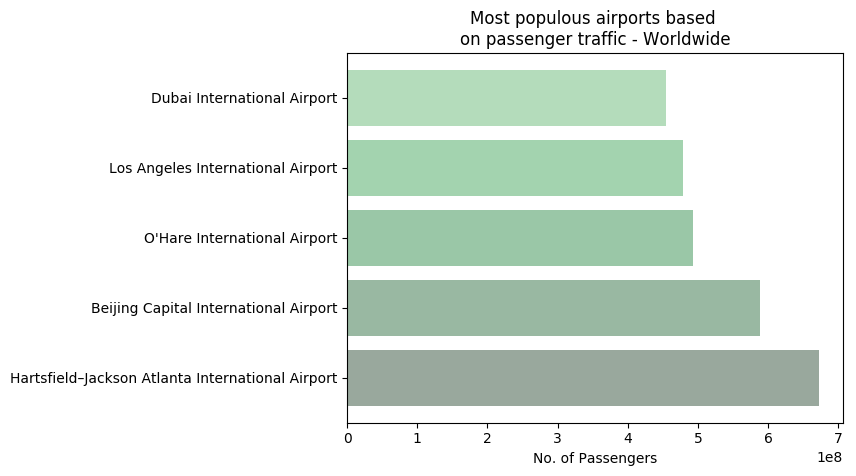

In [28]:
# We took this newly created sub dataframe called 'topFiveCountryPassengerTraffic_df' and 
# By using the Matplot Library we created a bar chart
# By using the Seaborn Library we applied gradient color to the bar chart

objects = list(topFiveCountryPassengerTraffic_df.index)
y_pos = np.arange(len(objects))
performance = topFiveCountryPassengerTraffic_df["Total Passengers"].tolist()

plt.barh(y_pos,performance, align='center',alpha=0.5, color = sns.color_palette("Greens_d"))
plt.yticks(y_pos, objects, rotation = 0)
plt.xlabel('No. of Passengers')
plt.title('Most populous airports based \non passenger traffic - Worldwide')

plt.show()

Plot - Passenger traffic growth pattern - Worldwide

In [ ]:
airportNamesWorldwide = list(topFiveCountryPassengerTraffic_df.index)

for airport in airportNamesWorldwide:
    row = passengerTraffic_df.loc[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Trends in passenger traffic\n(2010 - 2016) - Worldwide")

plt.show()

Analysis - USA passenger traffic and growth pattern

In [ ]:
USAPassengerTraffic_df = countryPassengerTraffic_df.loc[countryPassengerTraffic_df["Country"] == "United States"]

USAPassengerTraffic_df = USAPassengerTraffic_df.sort_values(["Total Passengers"], ascending = [False]).head(5)

Plot - Most populous airports based on passenger traffic - USA

In [ ]:
objects = list(USAPassengerTraffic_df.index)
y_pos = np.arange(len(objects))
performance = USAPassengerTraffic_df["Total Passengers"].tolist()


plt.barh(y_pos, performance, align='center', alpha=0.5, color = sns.color_palette("Reds_d"))
plt.yticks(y_pos, objects, rotation = 0)
plt.ylabel('No of Passengers')
plt.title('Most popular airports based \non passenger traffic - USA')

plt.show()

In [ ]:
airportNamesUSA = list(USAPassengerTraffic_df.index)

for airport in airportNamesUSA:
    row = passengerTraffic_df.loc[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Trends in passenger traffic (2010 - 2016) - USA")

plt.show()




Predictive Analysis on passenger traffic growth pattern to indentify the top 5 busiest airports


In [ ]:
countryPassengerTraffic = ['Country','2010 Total passengers','2011 Total passengers','2012 Total passengers','2013 Total passengers','2014 Total passengers','2015 Total passengers','2016 Total passengers']
countryPassengerTraffic_df = pd.DataFrame(df,columns=countryPassengerTraffic)

In [ ]:
passengerTrafficPercentage =['2010 % change','2011 % change','2012 % change','2013 % change','2014 % change','2015 % change','2016 % change']
passengerTrafficPercentage_df = pd.DataFrame(df,columns=passengerTrafficPercentage)

In [ ]:
iSum = 0
#iCount = 0
lresult= []

for index, row in passengerTrafficPercentage_df.iterrows():
    for iRow in range(0, len(passengerTrafficPercentage)):
        if (pd.notnull(row[iRow]) and row[iRow]!=""):
            iSum = iSum + row[iRow]
            iCount += 1
    if iSum != 0 : #and iCount != 0:
        value = iSum / iCount
    lresult.append(value)
    iSum = 0
    #iCount = 0

countryPassengerTraffic_df["Total % change"] = np.asarray(lresult)


Prediction Logic

In [ ]:
for i in range (2017,2022):
    futureYear = i
    currentYear = i-1
    futureIndex = str(futureYear) + " Total passengers"
    currentIndex = str(currentYear) + " Total passengers"
    val = []
    countryPassengerTraffic_df = countryPassengerTraffic_df[countryPassengerTraffic_df[currentIndex].notnull()]
    countryPassengerTraffic_df[futureIndex] = 0
    for row in countryPassengerTraffic_df[currentIndex]:
        if (pd.notnull(row)):
            value = (row * (1+ (countryPassengerTraffic_df['Total % change']/100)))
        val.append(value)
    countryPassengerTraffic_df[futureIndex] = np.asarray(val)

Top 5 Airports by 2021 - Worldwide

In [ ]:
topFive2020CountryPassengerTraffic_df = countryPassengerTraffic_df.sort_values(["2021 Total passengers"], ascending = [False]).head(5)

futurePassengerTraffic = ['2017 Total passengers','2018 Total passengers','2019 Total passengers','2020 Total passengers','2021 Total passengers']
futurePassengerTraffic_df = pd.DataFrame(countryPassengerTraffic_df,columns=futurePassengerTraffic)
futurePassengerTraffic_df.columns = [2017, 2018, 2019, 2020, 2021]

In [ ]:
airportNamesWorldwide = list(topFive2020CountryPassengerTraffic_df.index)

for airport in airportNamesWorldwide:
    row = futurePassengerTraffic_df.loc[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Predicted Trends in Passenger Traffic\n(2017 - 2021) - Worldwide")

plt.show()

Top 5 Airports by 2021 - USA

In [ ]:
futureUSAPassengerTraffic_df = countryPassengerTraffic_df.loc[countryPassengerTraffic_df["Country"] == "United States"]

futureUSAPassengerTraffic_df = futureUSAPassengerTraffic_df.sort_values(["2021 Total passengers"], ascending = [False]).head(5)

In [ ]:
airportNamesUSA = list(futureUSAPassengerTraffic_df.index)

for airport in airportNamesUSA:
    row = futurePassengerTraffic_df.loc[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Predicted Trends in Passenger Traffic\n(2017 - 2021) - USA")

plt.show()

Pie Chart

In [ ]:
result0 = pd.DataFrame(topFiveCountryPassengerTraffic_df.groupby([topFiveCountryPassengerTraffic_df.index], as_index = True).agg({'Total Passengers':sum}).sort_values(by = 'Total Passengers', ascending=False))

result1 = pd.DataFrame(topFive2020CountryPassengerTraffic_df.groupby([topFive2020CountryPassengerTraffic_df.index], as_index = True).agg({'2020 Total passengers':sum}).sort_values(by = '2020 Total passengers', ascending=False))

values0 = [float(i) for i in result0["Total Passengers"]]
values1 = [float(i) for i in result1["2020 Total passengers"]]

values=[values0, values1]
colors = ['b', 'g', 'r', 'c', 'm']

labels0 = [str(i) for i in result0.index.str.encode('utf-8')]
labels1 = [str(i) for i in result1.index.str.encode('utf-8')]


labels=[labels0, labels1]
title=['Popular airports based on passengers 2010 - 2016','Popular airports based on passengers 2017 - 2021']

# move the second value section out of the chart. The higher the number the farther it gets moved

explode = (0.1, 0, 0, 0, 0)

for i in range(0,2):

# autopct the %.1f is Python formating and %% used to show as percent
    plt.figure(i)
    fig=plt.figure(figsize=(5, 3), dpi= 80, facecolor='w')
    labels[i] = [x.decode('UTF8') for x in labels[i]]
    plt.pie(values[i], colors=colors, labels=labels[i], 
            explode=explode, autopct='%.1f%%',
            counterclock=False, shadow=True)

    plt.title(title[i])


plt.show()
